## Probability
probability is how strongly we believe an event will happen.  
  
**probability vs likelihood**
- probability is about quantifying predictions of events yet to happen.
- likelihood is measuring the frequency of events that already occured. 
  
#### Bayes' Theorem
$$ P(A|B) = {P(B|A)*P(A) \over P(B)} $$
<br>

#### joint probability 
$$ P(AandB) = {P(A|B)*P(B)} $$
<br>

#### union probability
$$ P(AUB) = {P(A) + P(B) - (P(A|B)*P(B))} $$

### **Normal Distribution**
The Normal distribution or Gaussian distribution is characterized by the **bell curve**.  
Normal distribution is symmetric and has its **mean=median=mode**.  
  
The Normal distribution whose **mean=0** and **standard deviation=1** is termed as **standard normal distribution**.  
  
probability density function:

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$
  
where:  
$\mu$ - mean  
$\sigma$ - standard deviation  

<Axes: ylabel='Count'>

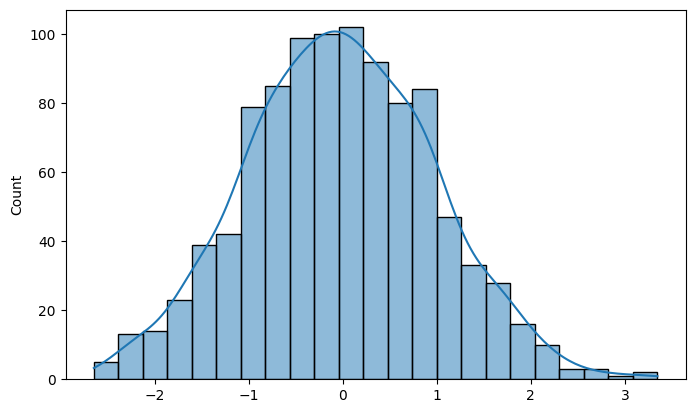

In [9]:
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns

data = normal(size=1000)
plt.figure(figsize=(8,4.8))
sns.histplot(data,kde=True)

### **Binomial Distribution**
It is defined on the number of successes on independent experiments with a boolean outcome.  
$$P(x) = {^nC~x~} * p^x * q^{n-x}$$  
where:  
n - number of trials  
x - number of success desired  
p - probability of success in one trial  
q - 1-p
<br>

Example:
<br>
![Binomial distribution](img/Binomial.png)

### **Beta distribution**
- beta distribution is the distribution of probabilities
- It is used when the underlying probability is uncertain, like in the binomial distribution when the probability of success in one trial is unknown.
- Eg: It can be used to find the probability that an 8/10 success in a trial would mean 90% success rate -   `beta.cdf(0.90, 8, 2)`


$${f(x;\alpha,\beta)} = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {\Beta(\alpha,\beta)}$$
  
  where:  
  x - probability  
  $\alpha$ - number of success in the trial + 1  
  $\beta$ - number of failures + 1  
  $\Beta$ - Beta function
<br>

Example:
<br>
![](img/Beta_distribution.png)

### **log normal distribution**
As the name suggests, if we took the log of the data points in a log-normal distribution, the transformed data will fit a normal distribution.  
The log-normal distribution is a right skewed continuous probability distribution, meaning it has a long tail towards the right.  
It is used for modelling various natural phenomena such as income distributions, the length of chess games or the time to repair a maintainable system and more.  
  
The probability density function is :
  
![](img/lognormaleq.webp)
  
where:  
$\mu$ - location parameter  
$\sigma$ - scale parameter  
  
These two parameters should not be mistaken for the more familiar mean or standard deviation from a normal distribution. When our log-normal data is transformed using logarithms our μ can then be viewed as the mean (of the transformed data) and σ as the standard deviation (of the transformed data). But without these transformations μ and σ here are simply two parameters that define our log-normal, not the mean or standard deviation.

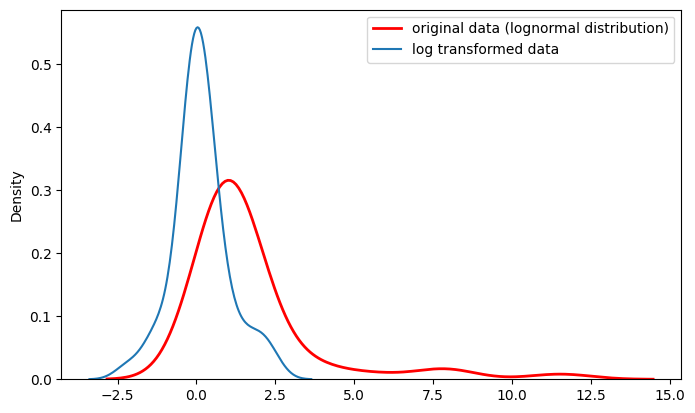

In [3]:
from numpy.random import lognormal
from numpy import log
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4.8))

data = lognormal(size=50)
sns.kdeplot(data,label='original data (lognormal distribution)',linewidth=2,color='red')
sns.kdeplot(log(data),label='log transformed data')
plt.legend()

### **power law distribution**
power law is a functional relationship between two quantities, where one quantity varies as a power of another.  
Examples are :- 
- length and area of a square
- size of power outages

There is a linear relationship when logarithms are taken of both f(x) and x. This straight line on the *log-log* plot is a necessary but not sufficient condition of power law.  
Mathematically, a strict power law cannot be a probability distribution, but a distribution that is a truncated power function is possible.  
some of the examples are :-  
- fractals
- pareto distribution
- kepler's third law
- wealth distribution
- exponential distribution

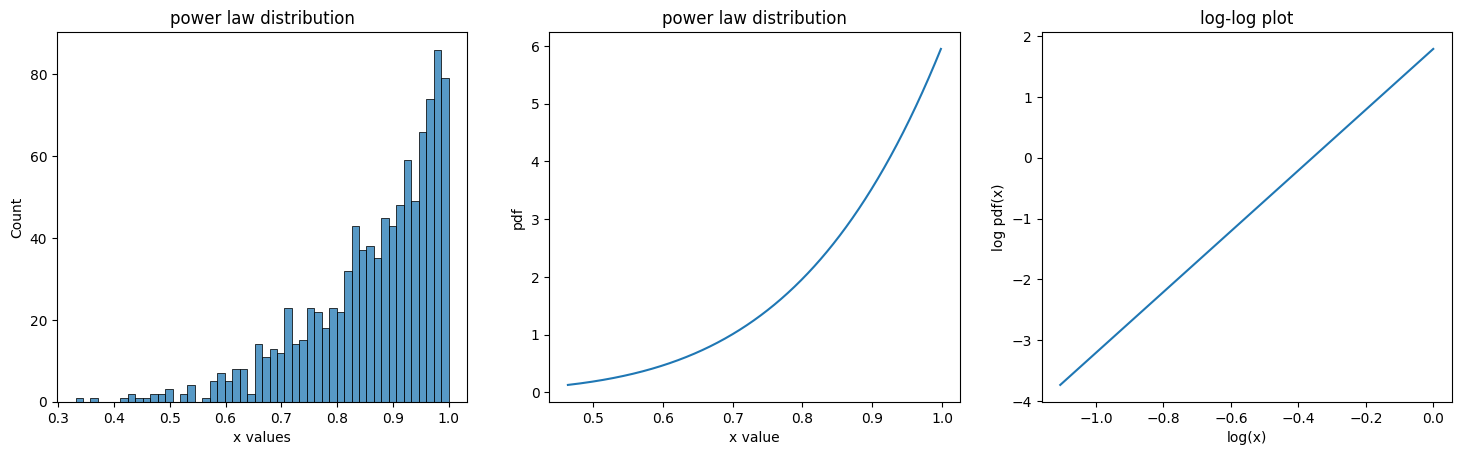

In [2]:
import numpy as np
import seaborn as sns
from numpy.random import power
from scipy.stats import powerlaw
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,3, figsize=(18,4.8) )

a=6

data = power(a=a,size=1000)
ax1 = sns.histplot(data, bins=50, ax=ax[0])
ax1.set(xlabel='x values', title='power law distribution')

# 'scipy powerlaw' and 'numpy power' uses equivalent equations
data2 = np.linspace(powerlaw.ppf(0.01,a),powerlaw.ppf(0.99,a),num=1000)
ax2 = sns.lineplot(x=data2,y=powerlaw.pdf(data2,a),ax=ax[1])
ax2.set(xlabel='x value', ylabel='pdf', title='power law distribution')

ax3 = sns.lineplot(x=np.log(data),y=np.log(powerlaw.pdf(data,a)),ax=ax[2])
ax3.set(xlabel='log(x)', ylabel='log pdf(x)', title='log-log plot')

plt.show()

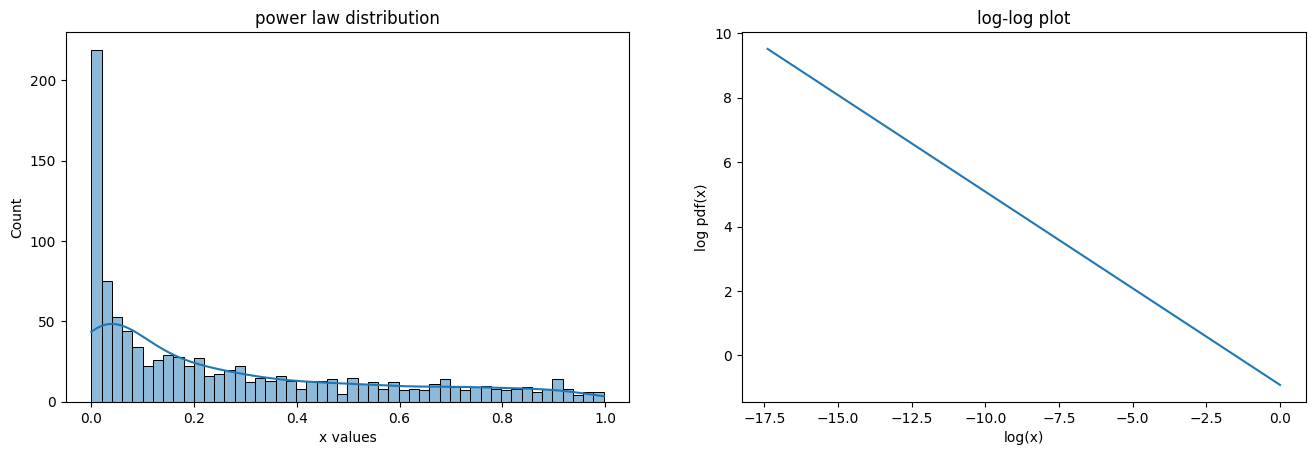

In [5]:
import numpy as np
from numpy.random import power
from scipy.stats import powerlaw

fig,ax = plt.subplots(1,2, figsize=(16,4.8))

a=0.4

data = power(a=a,size=1000)
ax1 = sns.histplot(data, bins=50, ax=ax[0],kde=True)
ax1.set(xlabel='x values', title='power law distribution')

ax2 = sns.lineplot(x=np.log(data),y=np.log(powerlaw.pdf(data,a)),ax=ax[1])
ax2.set(xlabel='log(x)', ylabel='log pdf(x)', title='log-log plot')
plt.show()

#### **pareto principle or 80-20 rule**  
It states that 80% of the consequences comes from 20% of the causes.  
Examples :-
- 80% of the sales comes from 20% of the products
- 80% of the wealth is distributed among 20% of the people
- 80% of the bugs comes from 20% of the code

### **pareto distribution**
If X is a random variable, then the probability that X is greater than some number x, i.e. the survival function (also called tail function), is given by

$${\displaystyle {\overline {F}}(x)=\Pr(X>x)={\begin{cases}\left({\frac {x_{\mathrm {m} }}{x}}\right)^{\alpha }&x\geq x_{\mathrm {m} },\\1&x<x_{\mathrm {m} },\end{cases}}}$$


where xm is the (necessarily positive) minimum possible value of X, and α is a positive parameter. The Pareto Type I distribution is characterized by a scale parameter xm and a shape parameter α.  

probability density function :-  
$$f_X(x)= \begin{cases} \frac{\alpha x_\mathrm{m}^\alpha}{x^{\alpha+1}} & x \ge x_\mathrm{m}, \\ 0 & x < x_\mathrm{m}. \end{cases}$$

<Axes: title={'center': 'pareto distribution'}, xlabel='x value', ylabel='pdf'>

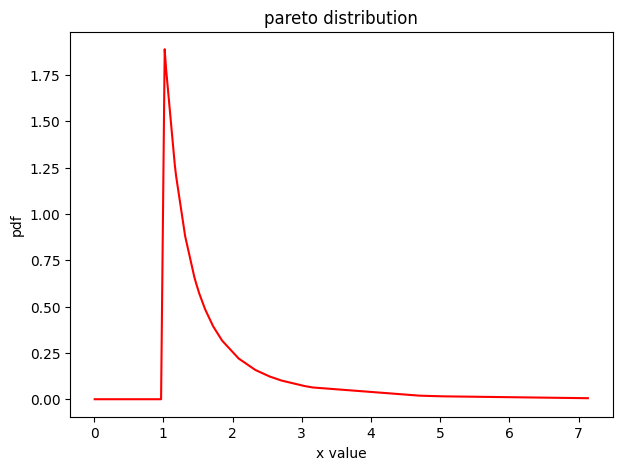

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import pareto
from scipy.stats import pareto as par


data = pareto(a=2,size=100)
plt.figure(figsize=(7,5))
plt.title('pareto distribution')
plt.xlabel('x value')
plt.ylabel('pdf')
sns.lineplot(x=data,y=par.pdf(data,2),color='red')

Text(0, 0.5, 'pdf')

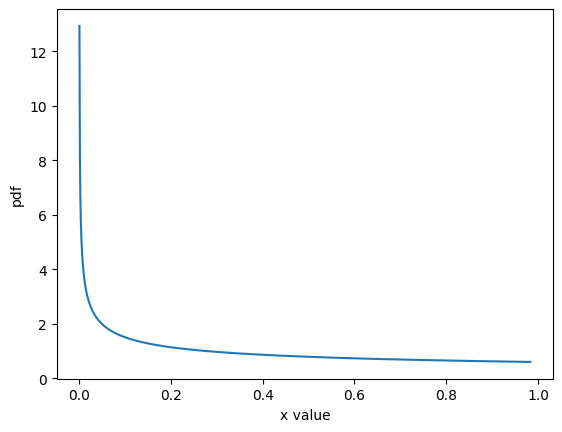

In [118]:
a=0.6
data = np.linspace(powerlaw.ppf(0.01,a),powerlaw.ppf(0.99,a),num=1000)
plt.plot(data, powerlaw.pdf(data,a))
plt.xlabel('x value')
plt.ylabel('pdf')

### **Poisson distribution**
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space.  
The Poisson distribution has only one parameter, **λ (lambda)**.  
  
In general, Poisson distributions are often appropriate for **count data**, that is, observations that are non-negative integers (0, 1, 2, 3,...)  
The Poisson distribution can be applied to systems with a large number of possible events, each of which is rare.  
  
This distribution can be used if:  
- Individual events happen at **random** and **independently**.
- **λ (lambda)** is known and is assumed to be constant.  
  <br>

Probability mass function is :-  
$${\displaystyle f(k;\lambda )=\Pr(X{=}k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$$
where:  
**k** - number of occurrences  
**λ** - mean number of events occuring in an **interval of time or space**. 
  
Example:-
- the number of meteorites greater than 1-meter diameter that strike Earth in a year;
- the number of laser photons hitting a detector in a particular time interval; and
- the number of students achieving a low and high mark in an exam.
  

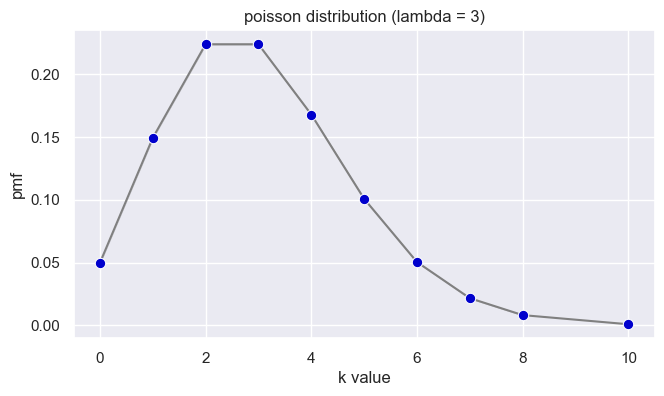

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import random
from scipy.stats import poisson

data = random.poisson(lam=3,size=1000)
plt.figure(figsize=(7.5,4))
sns.set_theme(style='darkgrid')
sns.lineplot(
    x=data,y=poisson.pmf(data, mu=3), color='gray',marker='.',markerfacecolor='mediumblue',markersize=15,
    ).set(title='poisson distribution (lambda = 3)', xlabel='k value', ylabel='pmf')
plt.show()

### **Uniform distribution**
A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability.  
probability density function on the interval [a,b] are :  
$${\displaystyle f(x)={\begin{cases}{\frac {1}{b-a}}&{\text{for }}a\leq x\leq b,\\[8pt]0&{\text{for }}x<a\ {\text{ or }}\ x>b.\end{cases}}}$$

[Text(0.5, 1.0, 'Uniform distribution on [0,1]'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'pdf = $\\frac{1}{b-a}$')]

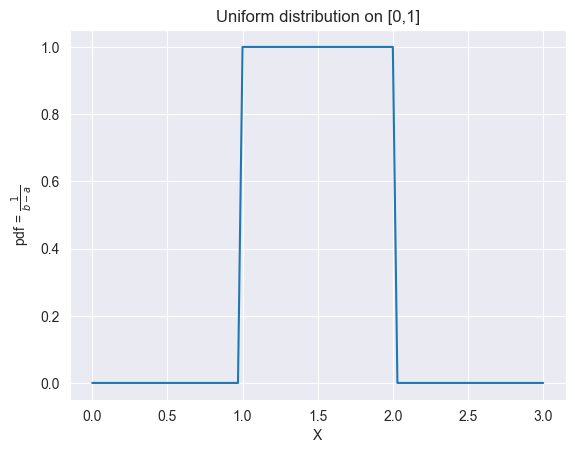

In [2]:
import numpy as np
from scipy.stats import uniform
import seaborn as sns

data = np.linspace(0,3,num=100)
sns.set_style(style='darkgrid')
sns.lineplot(x=data, y=uniform.pdf(data,loc=1,scale=1)).set(title='Uniform distribution on [0,1]',xlabel='X', ylabel=r'pdf = $\frac{1}{b-a}$')